In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
%cd "/content/drive/MyDrive/8 Semestre/Bloque 2/M2_IA/archive/tom_and_jerry"
!ls

/content/drive/MyDrive/8 Semestre/Bloque 2/M2_IA/archive/tom_and_jerry
tom_and_jerry_preprocessed  tom_and_jerry_raw


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
train_data_dir = 'tom_and_jerry_preprocessed/train'
valid_data_dir = 'tom_and_jerry_preprocessed/val'
test_data_dir = 'tom_and_jerry_preprocessed/test'

img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = valid_test_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = valid_test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 4216 images belonging to 4 classes.
Found 1095 images belonging to 4 classes.
Found 549 images belonging to 4 classes.


In [16]:
model = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 4)       112       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 8)         296       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 16)       

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=15,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

Epoch 1/15
131/131 [==============================] - 118s 893ms/step - loss: 0.5291 - accuracy: 0.7937 - val_loss: 0.6056 - val_accuracy: 0.7546
Epoch 2/15
131/131 [==============================] - 118s 897ms/step - loss: 0.5147 - accuracy: 0.8035 - val_loss: 0.5845 - val_accuracy: 0.7610
Epoch 3/15
131/131 [==============================] - 111s 845ms/step - loss: 0.4965 - accuracy: 0.8031 - val_loss: 0.5543 - val_accuracy: 0.7812
Epoch 4/15
131/131 [==============================] - 112s 852ms/step - loss: 0.4853 - accuracy: 0.8157 - val_loss: 0.5785 - val_accuracy: 0.7721
Epoch 5/15
131/131 [==============================] - 110s 837ms/step - loss: 0.4578 - accuracy: 0.8305 - val_loss: 0.5690 - val_accuracy: 0.7776
Epoch 6/15
131/131 [==============================] - 114s 867ms/step - loss: 0.4514 - accuracy: 0.8250 - val_loss: 0.5406 - val_accuracy: 0.7923
Epoch 7/15
131/131 [==============================] - 126s 959ms/step - loss: 0.4361 - accuracy: 0.8286 - val_loss: 0.5910 -

In [22]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.n // batch_size)
print(f"Test accuracy: {test_acc}")

17/17 [==============================] - 144s 9s/step - loss: 0.5095 - accuracy: 0.8419
Test accuracy: 0.841911792755127


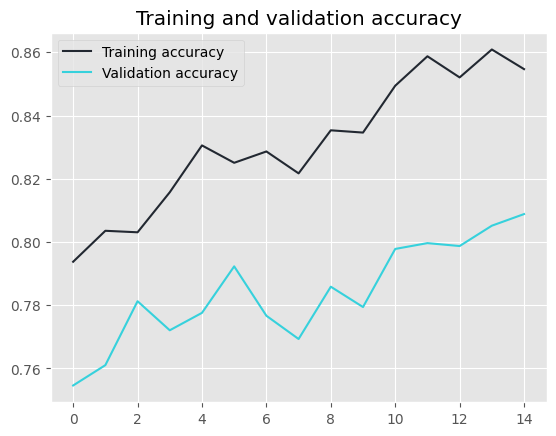

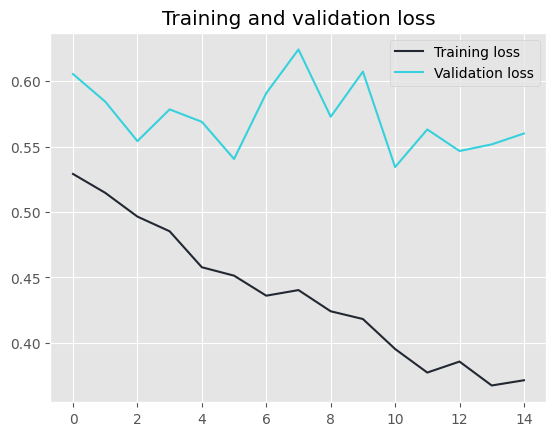

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.style.use('ggplot')

plt.plot(epochs, acc, color = "#222831", label='Training accuracy')
plt.plot(epochs, val_acc, color = "#36D1DC", label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, color = "#222831", label='Training loss')
plt.plot(epochs, val_loss, color = "#36D1DC", label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [24]:
predictions = model.predict(test_generator, steps=(test_generator.n // test_generator.batch_size) + 1)
predicted_classes = np.argmax(predictions, axis=-1)

18/18 [==============================] - 9s 476ms/step


In [25]:
true_classes = test_generator.classes

In [26]:
if len(predicted_classes) > len(true_classes):
    predicted_classes = predicted_classes[:len(true_classes)]

cm = confusion_matrix(true_classes, predicted_classes)
print(classification_report(true_classes, predicted_classes))


              precision    recall  f1-score   support

           0       0.17      0.20      0.19       124
           1       0.34      0.34      0.34       193
           2       0.21      0.20      0.21       154
           3       0.20      0.18      0.19        78

    accuracy                           0.25       549
   macro avg       0.23      0.23      0.23       549
weighted avg       0.25      0.25      0.25       549



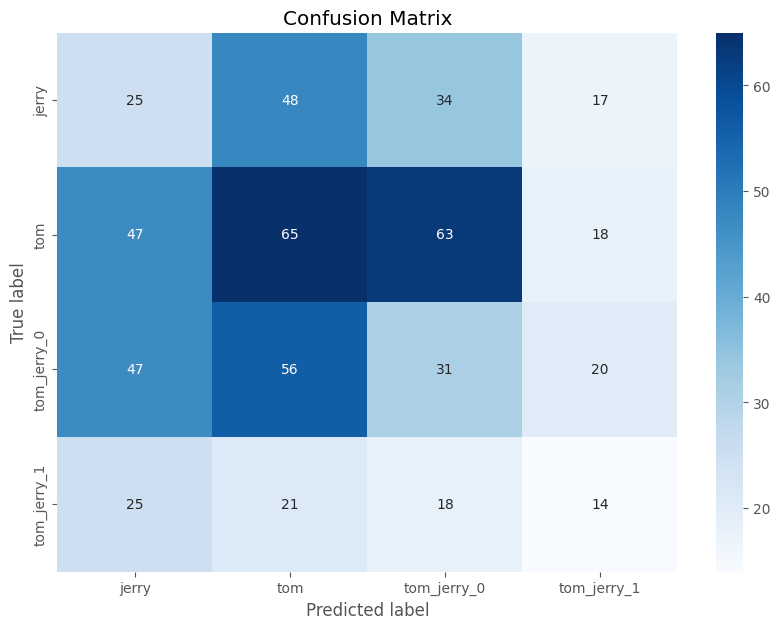

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=list(test_generator.class_indices.keys()), yticklabels=list(test_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
model.save("classif.keras")